In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "30hJ075y4muCHliY0vMtLgIGh"
consumer_secret = "SNOqK4WLZZSnxVovG9pcqKGKzkiGs0cX6bvjbwMygjyvumr9K4"
access_token = "879146821-Jfb0auYDhvOfnafgngWCD9TdBDNXqvRZM0IHO4Xv"
access_token_secret = "Q3xGGAgDTkeCFTNCnwSTVlIzNxs6bnX0uAd8rssk2ScF0"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

sentiments = []

In [3]:
for user in target_users:
    counter = 0
    public_tweets = api.user_timeline(user, count=100, result_type="recent")
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]
        
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        
        counter +=1

In [4]:
tweets_df = pd.DataFrame(sentiments).round(3)
tweets_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.000,Thu Apr 05 00:44:03 +0000 2018,0.0,1.000,0.000,Derbyshire Police: Choir of male PCs 'not very...,0,@BBCNews
1,0.000,Thu Apr 05 00:03:17 +0000 2018,0.0,1.000,0.000,Which? wants fire-risk fridges taken off the m...,1,@BBCNews
2,0.026,Wed Apr 04 23:50:46 +0000 2018,0.0,0.879,0.121,N Korea missile 'could reach UK shores within ...,2,@BBCNews
3,0.000,Wed Apr 04 23:48:00 +0000 2018,0.0,1.000,0.000,University of Hull beats Oxbridge in equality ...,3,@BBCNews
4,0.000,Wed Apr 04 23:42:57 +0000 2018,0.0,1.000,0.000,Human Planet: Tribe's treehouses not real home...,4,@BBCNews


In [5]:
tweets_df.to_csv("News_Mood.csv", index=False)

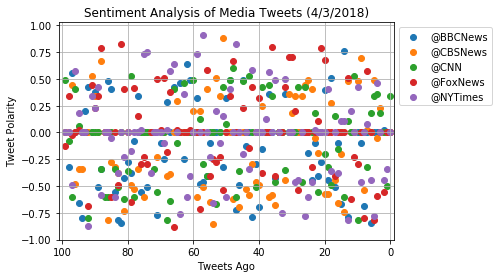

In [6]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    user_df = tweets_df.loc[tweets_df["User"] == user]
    plt.scatter(user_df["Tweets Ago"],user_df["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (4/3/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [7]:
user_df = tweets_df.set_index("User")
user_comp = user_df.Compound
comp_series = user_comp.groupby("User").mean()
comp_df = pd.DataFrame(comp_series)
comp_df

,Compound
User,
@BBCNews,-0.10369
@CBSNews,-0.08999
@CNN,-0.05991
@FoxNews,0.00501
@NYTimes,-0.03132


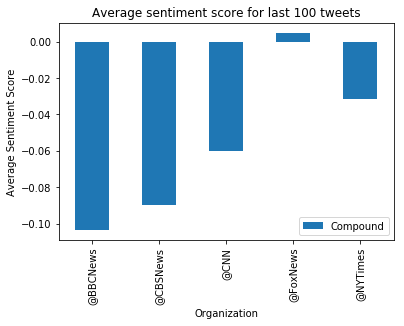

In [8]:
comp_df.plot(kind="bar")

plt.title("Average sentiment score for last 100 tweets")
plt.xlabel("Organization")
plt.ylabel("Average Sentiment Score")
plt.savefig("Sentiment_Average.png")
plt.show()